# Data Preparation

In [3]:
%load_ext autoreload
%autoreload 2

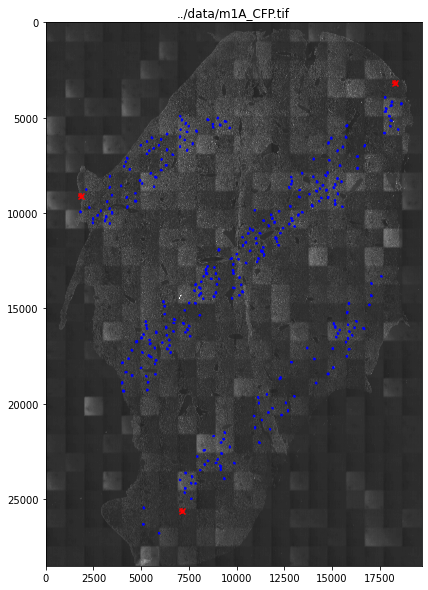

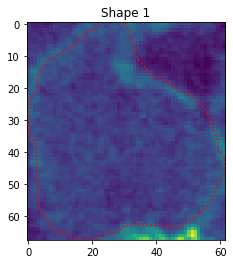

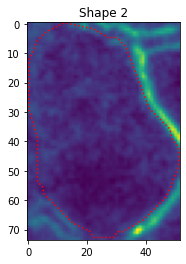

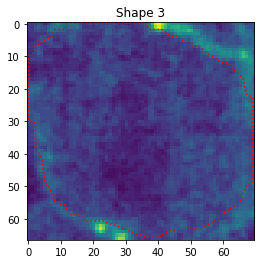

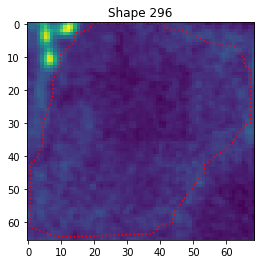

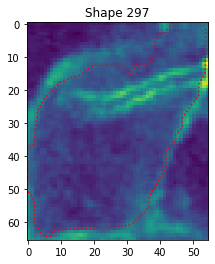

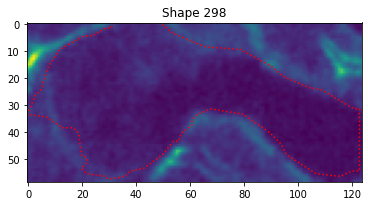

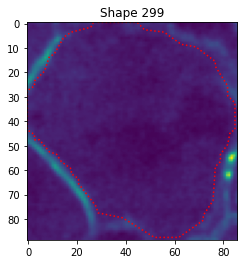

In [6]:
from utils import ImXML
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import requests

METADATA_PATH = '../data/coordinates_meta.txt'
IM_PATH = '../data/m1A_CFP.tif'
XML_PATH = '../data/EXP-220815_scDVP_m1A_PLATE-2.xml'
slide = 'm1A'

im_xml = ImXML(METADATA_PATH, XML_PATH, IM_PATH)
im_xml.calibration(slide)
im_xml.show_all_shapes()

for i in range(1,4):
    im_xml.slice_shape(i, plot=True)

for i in range(296,300):
    im_xml.slice_shape(i, plot=True)

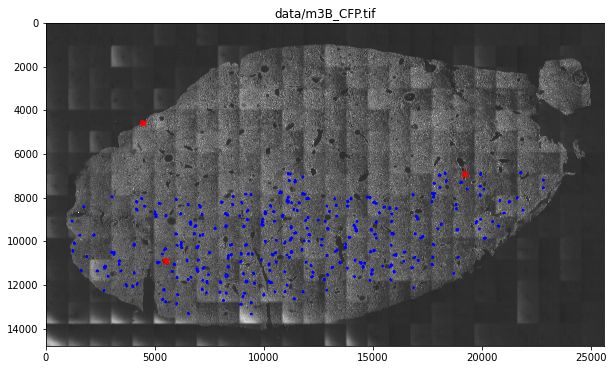

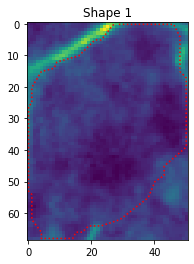

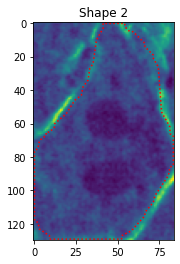

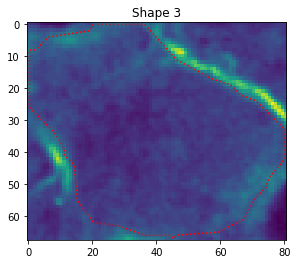

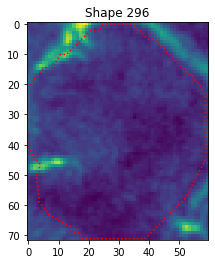

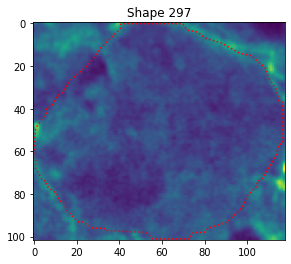

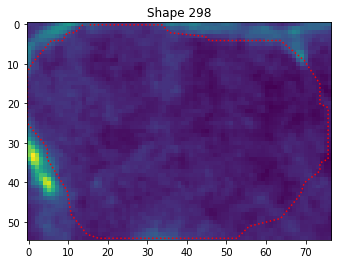

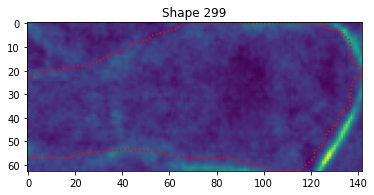

In [13]:
IM_PATH = 'data/m3B_CFP.tif'
XML_PATH = 'data/EXP-220815_scDVP_m3B_PLATE-2.xml'
slide = 'm3B'

im_xml = ImXML(METADATA_PATH, XML_PATH, IM_PATH)
im_xml.calibration(slide)
im_xml.show_all_shapes()
for i in range(1,4):
    im_xml.slice_shape(i, plot=True)

for i in range(296,300):
    im_xml.slice_shape(i, plot=True)

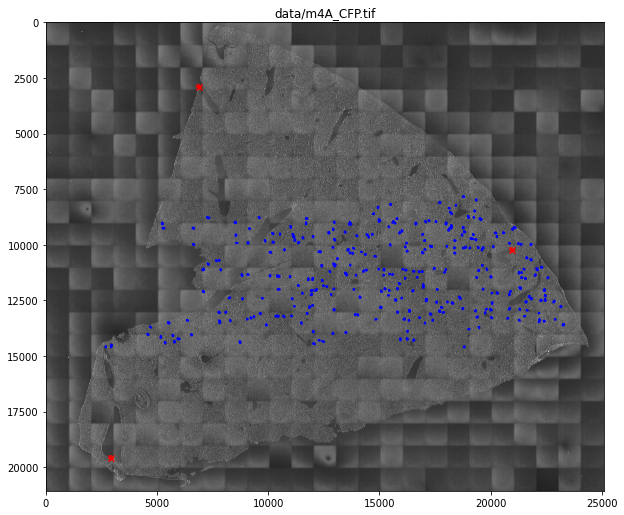

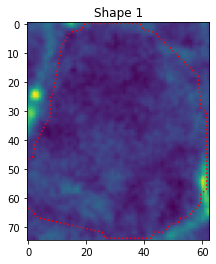

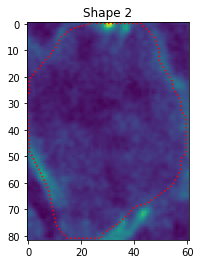

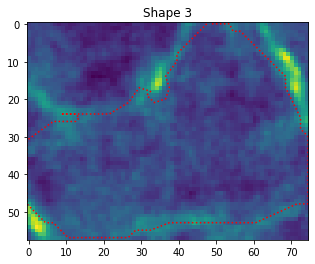

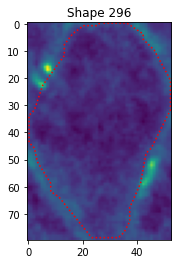

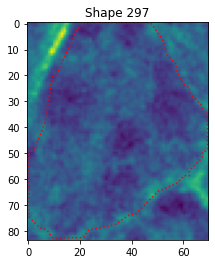

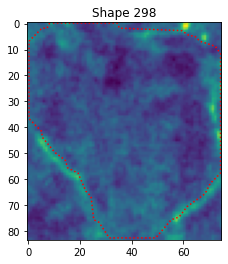

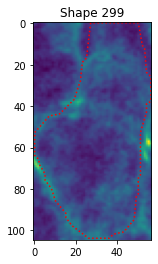

In [14]:

IM_PATH = 'data/m4A_CFP.tif'
XML_PATH = 'data/EXP-220815_scDVP_m4A_PLATE-2.xml'
slide = 'm4A'

im_xml = ImXML(METADATA_PATH, XML_PATH, IM_PATH)
im_xml.calibration(slide)
im_xml.show_all_shapes()
for i in range(1,4):
    im_xml.slice_shape(i, plot=True)

for i in range(296,300):
    im_xml.slice_shape(i, plot=True)

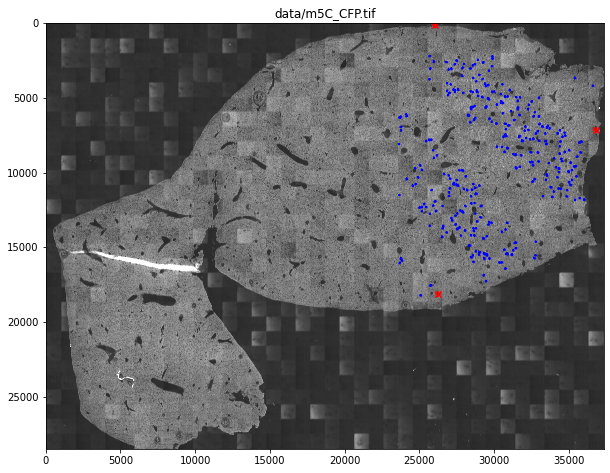

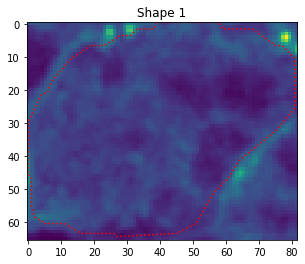

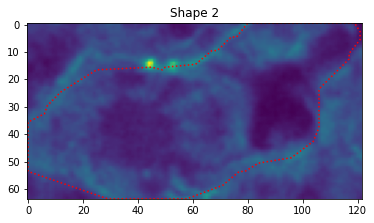

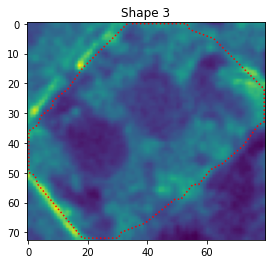

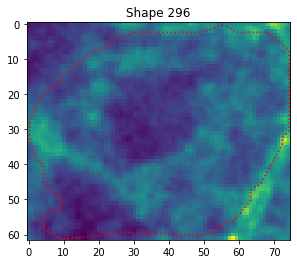

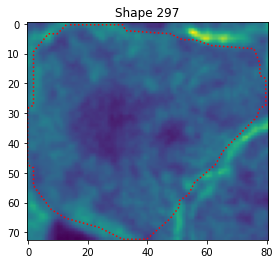

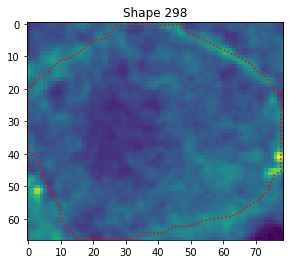

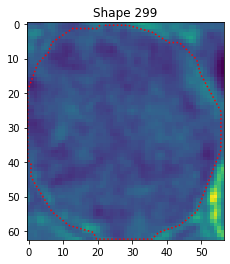

In [15]:

IM_PATH = 'data/m5C_CFP.tif'
XML_PATH = 'data/EXP-220815_scDVP_m5C_PLATE-2.xml'
slide = 'm5C'

im_xml = ImXML(METADATA_PATH, XML_PATH, IM_PATH)
im_xml.calibration(slide)
im_xml.show_all_shapes()
for i in range(1,4):
    im_xml.slice_shape(i, plot=True)

for i in range(296,300):
    im_xml.slice_shape(i, plot=True)

## Summary Statistics

In [7]:
today = datetime.datetime.now().date()

all_df = []

for slide in ['m1A','m3B', 'm4A','m5C']:

    XML_PATH = f'data/EXP-220815_scDVP_{slide}_PLATE-2.xml'
    print(XML_PATH)

    for IM_PATH in [f'data/{slide}_CFP.tif', f'data/{slide}_Alexa488.tif', f'data/{slide}_Alexa568.tif', f'data/{slide}_Alexa647.tif']:

        im_xml = ImXML(METADATA_PATH, XML_PATH, IM_PATH)
        im_xml.calibration(slide)
        df = im_xml.slice_shapes()

        all_df.append(df)

merged_df = pd.concat(all_df)
merged_df['Channel'] = merged_df['Image'].apply(lambda x: x.split('_')[-1][:-4])

merged_df.to_csv(f'./export/{today}_uncorrected.csv')

plt.figure(figsize=(20,5))
sns.violinplot(data=merged_df, x="Channel", y="Mean", hue = 'Slide')
plt.title('Mean intensity of Shape')
plt.savefig(f'./export/{today}_IntensityDistribution.pdf')
plt.show()


data/EXP-220815_scDVP_m1A_PLATE-2.xml


SAXParseException: <unknown>:1:4: not well-formed (invalid token)

In [10]:
today = datetime.datetime.now().date()

all_df = []

slide = 'm1A'

XML_PATH = 'data/EXP-220815_scDVP_m1A_PLATE-2.xml'

print(XML_PATH)

for IM_PATH in [f'data/{slide}_CFP.tif', f'data/{slide}_Alexa488.tif', f'data/{slide}_Alexa568.tif', f'data/{slide}_Alexa647.tif']:

    im_xml = ImXML(METADATA_PATH, XML_PATH, IM_PATH)
    im_xml.calibration(slide)
    df = im_xml.slice_shapes()

    all_df.append(df)

merged_df = pd.concat(all_df)
merged_df['Channel'] = merged_df['Image'].apply(lambda x: x.split('_')[-1][:-4])

merged_df.to_csv(f'../output/{today}_prediction_m1A.csv')


data/EXP-220815_scDVP_m1A_PLATE-2.xml


SAXParseException: <unknown>:1:4: not well-formed (invalid token)

In [18]:
today = datetime.datetime.now().date()

all_df = []

slide = 'm4A'

XML_PATH = 'data/EXP-221117_scDVP_m4A_PREDICTION.xml'

print(XML_PATH)

for IM_PATH in [f'data/{slide}_CFP.tif', f'data/{slide}_Alexa488.tif', f'data/{slide}_Alexa568.tif', f'data/{slide}_Alexa647.tif']:

    im_xml = ImXML(METADATA_PATH, XML_PATH, IM_PATH)
    im_xml.calibration(slide)
    df = im_xml.slice_shapes()

    all_df.append(df)

merged_df = pd.concat(all_df)
merged_df['Channel'] = merged_df['Image'].apply(lambda x: x.split('_')[-1][:-4])

merged_df.to_csv(f'./export/{today}_prediction_m4A.csv')


data/EXP-221117_scDVP_m4A_PREDICTION.xml


100%|██████████| 237/237 [00:06<00:00, 38.88it/s]


In [19]:
today = datetime.datetime.now().date()

all_df = []

slide = 'f1C'

XML_PATH = 'data/EXP-220815_scDVP_f1C_44shapes.xml'

print(XML_PATH)

for IM_PATH in [f'data/{slide}_CFP.tif', f'data/{slide}_Alexa488.tif', f'data/{slide}_Alexa568.tif', f'data/{slide}_Alexa647.tif']:

    im_xml = ImXML(METADATA_PATH, XML_PATH, IM_PATH)
    im_xml.calibration(slide)
    df = im_xml.slice_shapes()

    all_df.append(df)

merged_df = pd.concat(all_df)
merged_df['Channel'] = merged_df['Image'].apply(lambda x: x.split('_')[-1][:-4])

merged_df.to_csv(f'./export/{today}_prediction_f1C.csv')


data/EXP-220815_scDVP_f1C_44shapes.xml


  2%|▏         | 44/2200 [00:00<00:01, 1107.25it/s]


In [20]:
today = datetime.datetime.now().date()

all_df = []

slide = 'm1A'

XML_PATH = 'data/EXP-220815_scDVP_m1A_PARTIAL-SECTION.xml'

print(XML_PATH)

for IM_PATH in [f'data/{slide}_CFP.tif', f'data/{slide}_Alexa488.tif', f'data/{slide}_Alexa568.tif', f'data/{slide}_Alexa647.tif']:

    im_xml = ImXML(METADATA_PATH, XML_PATH, IM_PATH)
    im_xml.calibration(slide)
    df = im_xml.slice_shapes()

    all_df.append(df)

merged_df = pd.concat(all_df)
merged_df['Channel'] = merged_df['Image'].apply(lambda x: x.split('_')[-1][:-4])

merged_df.to_csv(f'./export/{today}_prediction_m1A_partial.csv')


data/EXP-220815_scDVP_m1A_PARTIAL-SECTION.xml


100%|██████████| 1555/1555 [02:12<00:00, 11.76it/s]


In [21]:
if False:
    today = datetime.datetime.now().date()

    all_df = []

    slide = 'm1A'

    XML_PATH = 'data/EXP-220815_scDVP_m1A_PARTIAL-SECTION-EXTENDED_biasmeta.xml'

    print(XML_PATH)

    for IM_PATH in [f'data/{slide}_CFP.tif', f'data/{slide}_Alexa488.tif', f'data/{slide}_Alexa568.tif', f'data/{slide}_Alexa647.tif']:

        im_xml = ImXML(METADATA_PATH, XML_PATH, IM_PATH)
        im_xml.calibration(slide)
        df = im_xml.slice_shapes()

        all_df.append(df)

    merged_df = pd.concat(all_df)
    merged_df['Channel'] = merged_df['Image'].apply(lambda x: x.split('_')[-1][:-4])

    merged_df.to_csv(f'./export/{today}_prediction_m1A_PARTIAL-SECTION-EXTENDED_biasmeta.csv')
